## Inheritance Scope

When traversing an inheritance structure, the `inheritance_explorer` will by default walk any subclasses that are available within the scope of the python session. There are a number of ways to limit or change the scope of available subclasses.

### Starting class

The most obvious way to control the extent of the graph is to select a starting class below branch points. 

For example, the following maps from the `QAbstractButton` class of `QtWidgets`, showing all of the button-related QT widgets wrapped by `qtpy`:

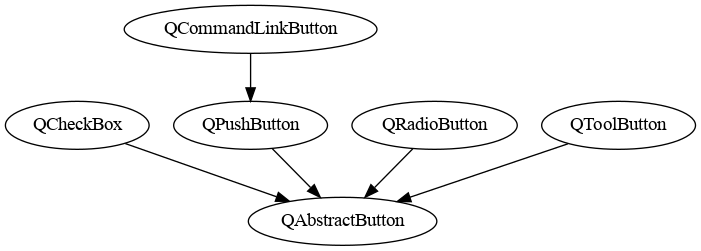

In [1]:
from inheritance_explorer import ClassGraphTree
from qtpy.QtWidgets import QAbstractButton, QPushButton

cgt = ClassGraphTree(QAbstractButton)#, max_recursion_level=2)#, classes_to_exclude=('QAbstractButton', 'QDialog'))
cgt.show_graph()

If we instead map from `QPushButton`, we'll obviously only get that branch:

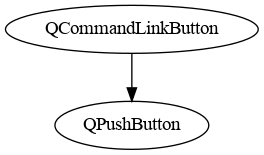

In [2]:
cgt = ClassGraphTree(QPushButton)
cgt.show_graph()

### Recursion level

We can also set the `max_recursion_level` argument to note how far down we want to go. In the following, we map out only the immediate children of `QAbstractButton`:

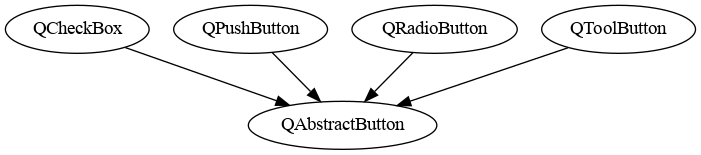

In [3]:
cgt = ClassGraphTree(QAbstractButton, max_recursion_level=0)
cgt.show_graph()

### Excluding branches

By setting the `classes_to_exclude` argument, we can easily prune branches, leaving only those of interest:

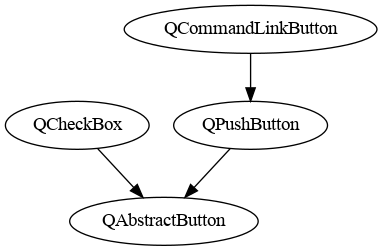

In [4]:
cgt = ClassGraphTree(QAbstractButton, classes_to_exclude=('QRadioButton', 'QToolButton'))
cgt.show_graph()

### Imported Packages

Finally, because the `inheritance_explorer` is a dynamic walker, the resulting graph can change depending on what packages you have imported! If you import packages that subclass the parent of interest, then you'll get all those cases as well. 

For example, if we map `collecitons.defaultdict`, we get a simple inheritance structure:

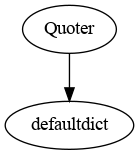

In [5]:
from inheritance_explorer import ClassGraphTree
from collections import defaultdict
cgt = ClassGraphTree(defaultdict)
cgt.show_graph()

But if we import a package that implements its own `defaultdict` child class and then re-map, we will get additional entries! 

In this case, we are importing `yt` which uses custom `defaultdict` implementations in a number of places:

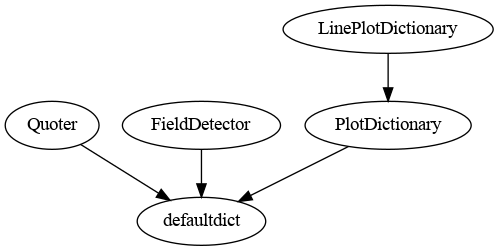

In [6]:
import yt
cgt = ClassGraphTree(defaultdict)
cgt.show_graph()